In [131]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [387]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [2]:
np.seterr(divide='ignore', invalid='ignore')
# Initialize Classifier
RandomForest = RandomForestClassifier(max_depth=5, n_estimators=10, max_features='sqrt')

In [3]:
# ---------------------------------    
# Doc va xu ly so bo thong tin
df01=pd.read_csv('bank-additional/bank-additional-full.csv', sep=';',header=0)
df02=df01.dropna(axis=1, how='all')
df=df02.dropna(axis=0, how='any')
cols=df.dtypes
colnms=df.columns

In [4]:
# ---------------------------------
# Tach thong tin can thiet
i=0
cat_cols=[]
for eachcol in cols:
    if eachcol.name=="object":
        cat_cols.append(colnms[i])
    i+=1
    
df1=pd.get_dummies(df,columns=cat_cols)
n=len(df1.index)
m=len(df1.columns)
x_all=df1.iloc[:,0:(m-2)]
y_all=df1['y_yes']

In [335]:
# ---------------------------------
# Scale lai du lieu cua tap train va tap test
x_trn, x_tst, y_trn, y_tst = train_test_split(x_all, y_all, test_size=0.6, random_state=42)
scaler = MinMaxScaler()
scaler.fit(x_trn)
x_trn_n=scaler.transform(x_trn)
x_tst_n=scaler.transform(x_tst)

Random forest accuracy: 0.901%


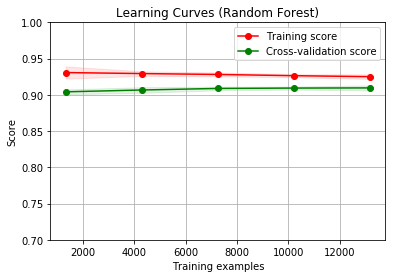

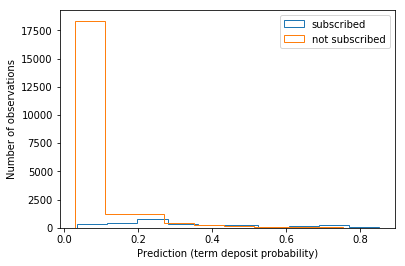

In [388]:
# ---------------------------------
# Train model

clf=RandomForest
model=clf.fit(x_trn_n,y_trn)

y_pred=model.predict(x_tst_n)
acc2=float((y_pred==y_tst).sum())/float(len(y_tst))
print("Random forest accuracy: {0:.3f}%".format(acc2))

clf.fit(x_trn_n, y_trn)

# learning Curve
title = "Learning Curves (Random Forest)"
estimator = RandomForestClassifier(max_depth=_max_depth, 
                                  min_samples_leaf=_min_samples_leaf, 
                                  n_estimators=_n_estimators, 
                                  max_features='sqrt')
plot_learning_curve(estimator, title, x_trn_n, y_trn, (0.7, 1.00), cv=cv, n_jobs=4)

plt.show()

# Histogram predictions without error bars:
y_hat = clf.predict_proba(x_tst_n)

idx_yes = np.where(y_tst == 1)[0]
idx_no = np.where(y_tst == 0)[0]

fig, ax = plt.subplots(1)
ax.hist(y_hat[idx_yes, 1], histtype='step', label='subscribed')
ax.hist(y_hat[idx_no, 1], histtype='step', label='not subscribed')
ax.set_xlabel('Prediction (term deposit probability)')
ax.set_ylabel('Number of observations')
plt.legend()


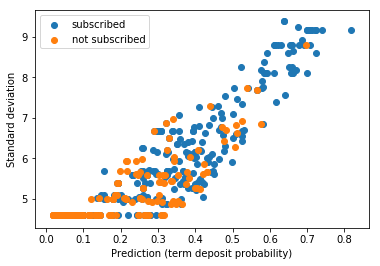

In [375]:
# ---------------------------------
# Tinh do lech tieu chuan

clf_V_IJ_unbiased = fci.random_forest_error(clf, x_trn_n, x_tst_n)
fig, ax = plt.subplots(1)
ax.scatter(y_hat[idx_yes, 1],
           np.sqrt(clf_V_IJ_unbiased[idx_yes]),
           label='subscribed')

ax.scatter(y_hat[idx_no, 1],
           np.sqrt(clf_V_IJ_unbiased[idx_no]),
           label='not subscribed')


ax.set_xlabel('Prediction (term deposit probability)')
ax.set_ylabel('Standard deviation')
plt.legend()
plt.show()

In [376]:
# ---------------------------------
# Tim trong so cua cac bien
imp=model.feature_importances_
var2imp=dict(zip(list(df1),imp))
var2imp_sorted=pd.DataFrame(columns=['variable','weight'])
for key in sorted(var2imp, key=lambda k:abs(var2imp[k]),reverse=True):
    temp=pd.DataFrame([[key,var2imp[key]]],columns=['variable','weight'])
    var2imp_sorted=var2imp_sorted.append(temp)
print("Top 10 important variables:")
print(var2imp_sorted[0:10])

Top 10 important variables:
               variable    weight
0              duration  0.245077
0             euribor3m  0.190432
0           nr.employed  0.115237
0         cons.conf.idx  0.114172
0                 pdays  0.071745
0          emp.var.rate  0.055536
0      poutcome_success  0.052598
0  poutcome_nonexistent  0.031344
0                   age  0.017010
0      contact_cellular  0.015311


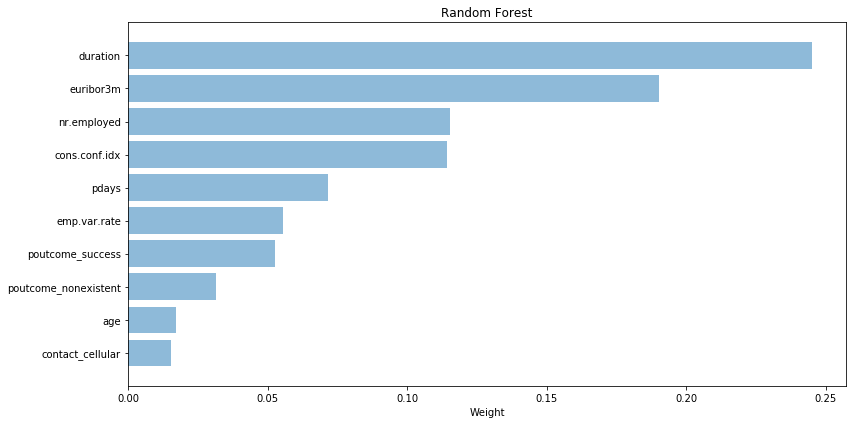

In [377]:
# ---------------------------------
# Ve bieu do trong so cua cac bien
var_names=list(var2imp_sorted['variable'][0:10])
var_imp=list(var2imp_sorted['weight'][0:10])
y_pos = np.arange(len(var_names),0,-1)
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(y_pos, var_imp, align='center', alpha=0.5)
plt.yticks(y_pos, var_names)
plt.xlabel('Weight')
plt.title('Random Forest')
plt.ylim(0,11)
plt.tight_layout()
fig.savefig('plot.png',dpi=400)

In [9]:
# ---------------------------------
# Su dung grid search de tim thong so
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt')

param_grid = {
                "n_estimators" : [9, 18, 27],
                "max_depth" : [1, 5, 10],
                "min_samples_leaf" : [1, 4, 8]}
                
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10)
CV_rfc.fit(x_trn_n, y_trn)
print(CV_rfc.best_params_)

{'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 9}


Random forest accuracy: 0.904%


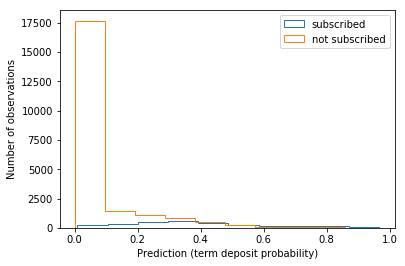

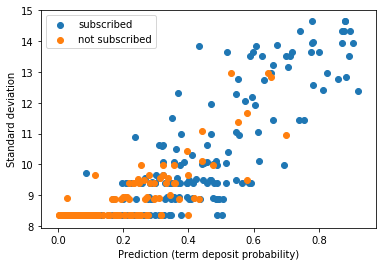

In [380]:
# ---------------------------------
# Kiem tra do chinh xac cua model voi thong so moi
_max_depth = CV_rfc.best_params_['max_depth']
_min_samples_leaf = CV_rfc.best_params_['min_samples_leaf']
_n_estimators = CV_rfc.best_params_['n_estimators']
rclf = RandomForestClassifier(max_depth=_max_depth, 
                              min_samples_leaf=_min_samples_leaf, 
                              n_estimators=_n_estimators, 
                              max_features='sqrt')
model=rclf.fit(x_trn_n,y_trn)
y_pred=model.predict(x_tst_n)
acc2=float((y_pred==y_tst).sum())/float(len(y_tst))
print("Random forest accuracy: {0:.3f}%".format(acc2))

y_hat = rclf.predict_proba(x_tst_n)

idx_yes = np.where(y_tst == 1)[0]
idx_no = np.where(y_tst == 0)[0]

# Histogram predictions without error bars:
fig, ax = plt.subplots(1)
ax.hist(y_hat[idx_yes, 1], histtype='step', label='subscribed')
ax.hist(y_hat[idx_no, 1], histtype='step', label='not subscribed')
ax.set_xlabel('Prediction (term deposit probability)')
ax.set_ylabel('Number of observations')
plt.legend()

rclf_V_IJ_unbiased = fci.random_forest_error(clf, x_trn_n, x_tst_n)
fig, ax = plt.subplots(1)
ax.scatter(y_hat[idx_yes, 1],
           np.sqrt(rclf_V_IJ_unbiased[idx_yes]),
           label='subscribed')

ax.scatter(y_hat[idx_no, 1],
           np.sqrt(rclf_V_IJ_unbiased[idx_no]),
           label='not subscribed')


ax.set_xlabel('Prediction (term deposit probability)')
ax.set_ylabel('Standard deviation')
plt.legend()
plt.show()

In [25]:
rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt')
param_distributions = {"n_estimators" : [9, 12, 15, 18, 21, 24, 27],
                       "max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                       "min_samples_leaf" : [1, 2, 4, 6, 8]}

RSCV_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_distributions, cv=10)

RSCV_rfc.fit(x_trn_n, y_trn)
print(RSCV_rfc.best_params_)

{'n_estimators': 27, 'min_samples_leaf': 1, 'max_depth': 9}


In [365]:
def plot_param_max_depth(list_of_max_depth, n_estimators, min_samples_leaf):
    list_of_acc = []
    for max_depth_i in list_of_max_depth:
        rfc_t = RandomForestClassifier(max_depth=max_depth_i,
                                    min_samples_leaf=min_samples_leaf,
                                    n_estimators=n_estimators,
                                    max_features='sqrt')
        model_t = rfc_t.fit(x_trn_n, y_trn)
        y_pred_t = model_t.predict(x_tst_n)
        
        acc_t = accuracy_score(y_tst, y_pred_t)
        list_of_acc.append(acc_t)
        
    plt.figure()
    plt.xlabel("Max depth")
    plt.ylabel("Accuracy")
    plt.plot(list_of_max_depth, list_of_acc, 'o-', color='r', label='Accuracy')
    plt.show()

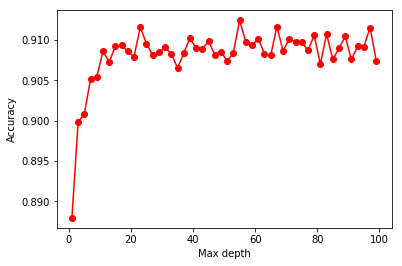

In [282]:
list_of_md = [i for i in range(1, 100, 2)]
plot_param_max_depth(list_of_md, _n_estimators, _min_samples_leaf)

In [381]:
def plot_param_n_estimators(max_depth, list_of_n_estimators, min_samples_leaf):
    list_of_acc = []
    list_of_mse = []
    for n_estimators_i in list_of_n_estimators:
        rfc_t = RandomForestClassifier( max_depth=max_depth,
                                        min_samples_leaf=min_samples_leaf,
                                        n_estimators=n_estimators_i,
                                        max_features='sqrt')
        model_t = rfc_t.fit(x_trn_n, y_trn)
        y_pred_t = model_t.predict(x_tst_n)
        
        acc_t = accuracy_score(y_tst, y_pred_t)
        list_of_acc.append(acc_t)

    plt.figure()
    plt.xlabel("Number of Estimators")
    plt.ylabel("Accuracy")
    plt.plot(list_of_n_estimators, list_of_acc, 'o-', color='b', label="Accuracy")
    plt.show()


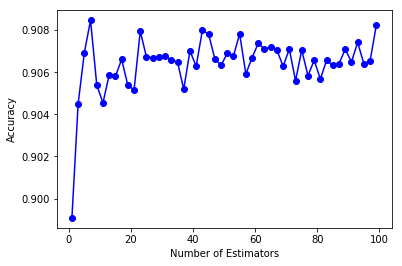

In [382]:
list_of_nes = [i for i in range(1, 100, 2)]
plot_param_n_estimators(_max_depth, list_of_nes, _min_samples_leaf)

In [383]:
def plot_param_min_samples_leaf(max_depth, n_estimators, list_of_min_samples_leaf):
    list_of_acc = []
    list_of_mse = []
    for min_samples_leaf_i in list_of_min_samples_leaf:
        rfc_t = RandomForestClassifier( max_depth=max_depth,
                                        min_samples_leaf=min_samples_leaf_i,
                                        n_estimators=n_estimators,
                                        max_features='sqrt')
        model_t = rfc_t.fit(x_trn_n, y_trn)
        y_pred_t = model_t.predict(x_tst_n)
        
        acc_t = accuracy_score(y_tst, y_pred_t)
        list_of_acc.append(acc_t)
        

    plt.figure()
    plt.xlabel("Min samples leaf")
    plt.ylabel("Accuracy")
    plt.plot(list_of_min_samples_leaf, list_of_acc, 'o-', color='g', label="Accuracy")
    plt.show()

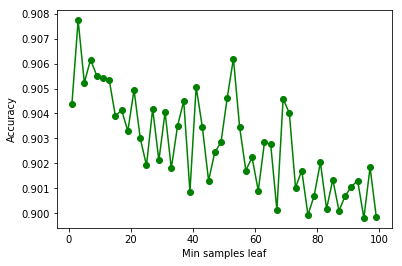

In [384]:
list_of_msl = [i for i in range(1, 100, 2)]
plot_param_min_samples_leaf(_max_depth, _n_estimators, list_of_msl)

In [385]:
def plot_param_max_features(max_depth, n_estimators, min_samples_leaf, list_of_max_features):
    list_of_acc = []
    list_of_mse = []
    for max_features_i in list_of_max_features:
        rfc_t = RandomForestClassifier(max_depth=max_depth,
                                    min_samples_leaf=min_samples_leaf,
                                    n_estimators=n_estimators,
                                    max_features=max_features_i)
        model_t = rfc_t.fit(x_trn_n, y_trn)
        y_pred_t = model_t.predict(x_tst_n)
        
        acc_t = accuracy_score(y_tst, y_pred_t)
        list_of_acc.append(acc_t)
        
    plt.figure()
    plt.xlabel("Max features")
    plt.ylabel("Accuracy")
    plt.plot(list_of_max_features, list_of_acc, 'o-', color='y', label="Accuracy")
    plt.show()

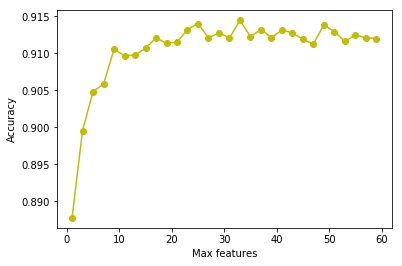

In [386]:
list_of_mf = [i for i in range(1, 60, 2)]
plot_param_max_features(_max_depth, _n_estimators, _min_samples_leaf, list_of_mf)

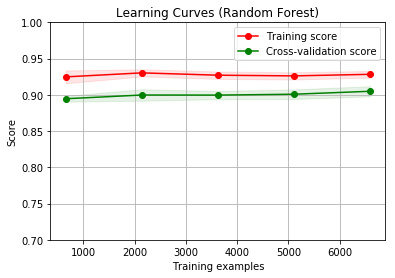

In [16]:
title = "Learning Curves (Random Forest)"
estimator = RandomForestClassifier(max_depth=_max_depth, 
                                  min_samples_leaf=_min_samples_leaf, 
                                  n_estimators=_n_estimators, 
                                  max_features='sqrt')
plot_learning_curve(estimator, title, x_trn_n, y_trn, (0.7, 1.00), cv=cv, n_jobs=4)

plt.show()